# Practicum Project: "Play Ball off of Payroll"

Author: Pat Kennedy

# Question To Answer

What effect does a MLB team’s payroll have on the success and output of the product on the field?

- Are there correlations with:
    - Winning percentage?
    - Team statistics?
        - Hitting
        - Pitching
    - Postseason?

# About the Data

2 datasets:
- Historical Dataset
    - 2019 – 2023
    - 1st half of dataset: Financial Data (Payroll Information & Ranking)
        - Source: https://www.mlb.com/stats/team
    - 2nd half of dataset: Performance Data (Win %, batting stats, pitching stats, Postseason - Y/N)
        - Source: https://www.espn.com/mlb/stats/team/_/season/2023/seasontype/2
- Future Dataset
    - 2024 Financial Data
      - Source: https://www.mlb.com/stats/team
    - No Performance Data (season has yet to start)
    - Goal: Make predictions for 2024 Performance Data


# Loading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# To Make graphics look better
sns.set() 

In [2]:
df = pd.read_csv('/Users/patkennedy/Desktop/Practicum/Data/MLB_HistoricalPayroll.csv')
df.head(20)

,Year,Rank,Team,League,26ManPayroll,InjuredReserve,Retained,Buried,TotalPayroll,Win%,AVG,OBP,SLG,OPS,ERA,WHIP,Postseason
0,2023,21,Arizona Diamondbacks,NL,"$60,263,998","$11,197,775","$39,202,529","$8,593,349","$119,257,651",0.519,0.250,0.322,0.408,0.730,4.48,1.32,1
1,2023,10,Atlanta Braves,NL,"$158,186,507","$34,160,535","$11,447,888","$2,444,201","$206,239,131",0.642,0.276,0.344,0.501,0.845,4.14,1.30,1
2,2023,29,Baltimore Orioles,AL,"$53,159,734","$3,179,476","$9,861,733","$4,860,104","$71,061,047",0.623,0.255,0.321,0.421,0.742,3.89,1.24,1
3,2023,13,Boston Red Sox,AL,"$128,063,857","$28,736,341","$22,444,333","$3,682,265","$182,926,796",0.481,0.258,0.324,0.424,0.748,4.52,1.34,0
4,2023,11,Chicago Cubs,NL,"$134,251,105","$12,522,069","$35,403,285","$6,732,899","$188,909,358",0.512,0.254,0.330,0.421,0.751,4.08,1.28,0
5,2023,15,Chicago White Sox,AL,"$93,892,616","$29,117,329","$38,812,106","$1,041,785","$162,863,836",0.377,0.238,0.291,0.384,0.675,4.87,1.42,0
6,2023,23,Cincinnati Reds,NL,"$44,815,845","$9,699,072","$38,896,450","$3,165,921","$96,577,288",0.506,0.249,0.327,0.420,0.746,4.83,1.42,0
7,2023,26,Cleveland Guardians,AL,"$54,881,912","$1,881,400","$30,397,406","$4,108,646","$91,861,627",0.469,0.250,0.313,0.381,0.695,3.99,1.31,0
8,2023,14,Colorado Rockies,NL,"$75,181,741","$46,742,764","$47,613,189","$1,488,913","$171,026,607",0.364,0.249,0.310,0.405,0.715,5.67,1.54,0
9,2023,20,Detroit Tigers,AL,"$82,493,535","$20,259,107","$15,005,322","$3,736,550","$121,494,514",0.481,0.236,0.305,0.382,0.687,4.24,1.25,0


In [3]:
df.shape

(120, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            120 non-null    int64  
 1   Rank            120 non-null    int64  
 2   Team            120 non-null    object 
 3   League          120 non-null    object 
 4   26ManPayroll    120 non-null    object 
 5   InjuredReserve  120 non-null    object 
 6   Retained        120 non-null    object 
 7   Buried          120 non-null    object 
 8   TotalPayroll    120 non-null    object 
 9   Win%            120 non-null    float64
 10  AVG             120 non-null    float64
 11  OBP             120 non-null    float64
 12  SLG             120 non-null    float64
 13  OPS             120 non-null    float64
 14  ERA             120 non-null    float64
 15  WHIP            120 non-null    float64
 16  Postseason      120 non-null    int64  
dtypes: float64(7), int64(3), object(7)


### What do each of these columns mean?

#### ID Columns
- Year: Season (2019, 2020, 2021, 2022, 2023, 2024)
- Rank: Total payroll relative to other teams in the league in that year (1-30)
- Team: Identifies the team city and name (30 different teams)
- League: League in which the team belongs in (15 teams in American League ('AL'), 15 in National League ('NL')
#### Financial Data Columns
- 26ManPayroll: The combined salaries for the active 26-man payroll
- InjuredReserve: The combined salaries of players currently on the IR
- Retained: The combined salaries for players released, bought out, or traded
- Buried: The combined salaries for any players buried in the Minor Leagues with Major League contract earnings
- TotalPayroll: The combined payroll salaries for all players on the active, injured, or a reserve list
#### Statistical Performance Data Columns
- Win%: The percentage of games won that season
- AVG: Team batting average
- OBP: Team on-base percentage
- SLG: Team slugging percentage
- ERA: Team earned-run average
- WHIP: Walks/Hits per innings pitched
- Postseason: Did the team make the playoffs that season? ('1' for yes and '0' for no)

# Data Cleaning

Since dollar signs and commas are making each of the payroll columns objects instead of numerical data, I am going to remove all dollar signs to change this:

In [5]:
df['TotalPayroll'] = df['TotalPayroll'].str[1:]

In [6]:
df.head()

,Year,Rank,Team,League,26ManPayroll,InjuredReserve,Retained,Buried,TotalPayroll,Win%,AVG,OBP,SLG,OPS,ERA,WHIP,Postseason
0,2023,21,Arizona Diamondbacks,NL,"$60,263,998","$11,197,775","$39,202,529","$8,593,349","119,257,651",0.519,0.250,0.322,0.408,0.730,4.48,1.32,1
1,2023,10,Atlanta Braves,NL,"$158,186,507","$34,160,535","$11,447,888","$2,444,201","206,239,131",0.642,0.276,0.344,0.501,0.845,4.14,1.30,1
2,2023,29,Baltimore Orioles,AL,"$53,159,734","$3,179,476","$9,861,733","$4,860,104","71,061,047",0.623,0.255,0.321,0.421,0.742,3.89,1.24,1
3,2023,13,Boston Red Sox,AL,"$128,063,857","$28,736,341","$22,444,333","$3,682,265","182,926,796",0.481,0.258,0.324,0.424,0.748,4.52,1.34,0
4,2023,11,Chicago Cubs,NL,"$134,251,105","$12,522,069","$35,403,285","$6,732,899","188,909,358",0.512,0.254,0.330,0.421,0.751,4.08,1.28,0


In [7]:
df['26ManPayroll'] = df['26ManPayroll'].str.replace(',', '')
df['26ManPayroll'] = df['26ManPayroll'].str.replace('$', '')
df['26ManPayroll'] = df['26ManPayroll'].astype(int)
df['InjuredReserve'] = df['InjuredReserve'].str.replace(',', '')
df['InjuredReserve'] = df['InjuredReserve'].str.replace('$', '')
df['InjuredReserve'] = df['InjuredReserve'].astype(int)
df['Retained'] = df['Retained'].str.replace(',', '')
df['Retained'] = df['Retained'].str.replace('$', '')
df['Retained'] = df['Retained'].astype(int)
df['Buried'] = df['Buried'].str.replace(',', '')
df['Buried'] = df['Buried'].str.replace('$', '')
df['Buried'] = df['Buried'].astype(int)
df['TotalPayroll'] = df['TotalPayroll'].str.replace(',', '')
df['TotalPayroll'] = df['TotalPayroll'].str.replace('$', '')
df['TotalPayroll'] = df['TotalPayroll'].astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            120 non-null    int64  
 1   Rank            120 non-null    int64  
 2   Team            120 non-null    object 
 3   League          120 non-null    object 
 4   26ManPayroll    120 non-null    int64  
 5   InjuredReserve  120 non-null    int64  
 6   Retained        120 non-null    int64  
 7   Buried          120 non-null    int64  
 8   TotalPayroll    120 non-null    int64  
 9   Win%            120 non-null    float64
 10  AVG             120 non-null    float64
 11  OBP             120 non-null    float64
 12  SLG             120 non-null    float64
 13  OPS             120 non-null    float64
 14  ERA             120 non-null    float64
 15  WHIP            120 non-null    float64
 16  Postseason      120 non-null    int64  
dtypes: float64(7), int64(8), object(2)


# Describing the Data 

Since I know that year, rank, team, and postseason are all categories, I am going to convert each of these columns as 'category':

In [9]:
df.Year = df.Year.astype('category')
df.Team = df.Team.astype('category')
df.League = df.League.astype('category')
df.Postseason = df.Postseason.astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Year            120 non-null    category
 1   Rank            120 non-null    int64   
 2   Team            120 non-null    category
 3   League          120 non-null    category
 4   26ManPayroll    120 non-null    int64   
 5   InjuredReserve  120 non-null    int64   
 6   Retained        120 non-null    int64   
 7   Buried          120 non-null    int64   
 8   TotalPayroll    120 non-null    int64   
 9   Win%            120 non-null    float64 
 10  AVG             120 non-null    float64 
 11  OBP             120 non-null    float64 
 12  SLG             120 non-null    float64 
 13  OPS             120 non-null    float64 
 14  ERA             120 non-null    float64 
 15  WHIP            120 non-null    float64 
 16  Postseason      120 non-null    category
dtypes: category(4), 

Now, columns that depict categegorical variables are indicated as a datatype that shows 'category'. A datatype that shows 'int64' or 'float64' indicates that a column that has continuous variables.

Next, I will look at the number of unique values in each column:

In [10]:
df.nunique()

Year                4
Rank               30
Team               31
League              2
26ManPayroll      120
InjuredReserve    120
Retained          120
Buried            120
TotalPayroll      120
Win%               61
AVG                48
OBP                49
SLG                71
OPS                87
ERA                92
WHIP               44
Postseason          2
dtype: int64

In [11]:
np.unique(df.Team)

array(['Arizona Diamondbacks', 'Atlanta Braves', 'Baltimore Orioles',
       'Boston Red Sox', 'Chicago Cubs', 'Chicago White Sox',
       'Cincinnati Reds', 'Cleveland Guardians', 'Cleveland Indians',
       'Colorado Rockies', 'Detroit Tigers', 'Houston Astros',
       'Kansas City Royals', 'Los Angeles Angels', 'Los Angeles Dodgers',
       'Miami Marlins', 'Milwaukee Brewers', 'Minnesota Twins',
       'New York Mets', 'New York Yankees', 'Oakland Athletics',
       'Philadelphia Phillies', 'Pittsburgh Pirates', 'San Diego Padres',
       'San Francisco Giants', 'Seattle Mariners', 'St. Louis Cardinals',
       'Tampa Bay Rays', 'Texas Rangers', 'Toronto Blue Jays',
       'Washington Nationals'], dtype=object)

The reason there are 31 teams instead of 30 is because the Clevland Indians changed their team name to the Clevland Guardians in 2022. There is no cleaning that needs to be done for this since this is not relevant to the research.

Next, I will look at some more summary statistics with the describe() function. I will rotate it using .T in order to display for easier reading:

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,120.0,1.550000e+01,8.691733e+00,1.000000e+00,8.000000e+00,1.550000e+01,2.300000e+01,3.000000e+01
26ManPayroll,120.0,8.227175e+07,5.492659e+07,1.025228e+07,4.319323e+07,6.140623e+07,1.200355e+08,2.310629e+08
InjuredReserve,120.0,2.185306e+07,2.394504e+07,2.096300e+05,6.799114e+06,1.341726e+07,2.896953e+07,1.475373e+08
Retained,120.0,1.892988e+07,1.883790e+07,1.131480e+05,7.885018e+06,1.456912e+07,2.475506e+07,1.582077e+08
Buried,120.0,3.082590e+06,2.785448e+06,1.993600e+05,1.174446e+06,2.412142e+06,3.814992e+06,1.571989e+07
TotalPayroll,120.0,1.272906e+08,6.913846e+07,2.347864e+07,7.258873e+07,1.161239e+08,1.797927e+08,3.436051e+08
Win%,120.0,4.999667e-01,8.741987e-02,3.090000e-01,4.367500e-01,5.030000e-01,5.632500e-01,7.170000e-01
AVG,120.0,2.447167e-01,1.279915e-02,2.120000e-01,2.367500e-01,2.440000e-01,2.552500e-01,2.760000e-01
OBP,120.0,3.174083e-01,1.365942e-02,2.810000e-01,3.097500e-01,3.170000e-01,3.272500e-01,3.490000e-01
SLG,120.0,4.090250e-01,2.920500e-02,3.460000e-01,3.870000e-01,4.070000e-01,4.272500e-01,5.010000e-01


This provides good context for a team's stats compared to others. 

# Feature Selection

First, I will define a nice color palette for my plots. This will allow my data to presented more clearly.

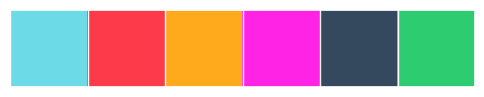

In [13]:
flatui = ["#6cdae7", "#fd3a4a", "#ffaa1d", "#ff23e5", "#34495e", "#2ecc71"]
sns.set_palette(flatui)
sns.palplot(sns.color_palette())

I am going to examine the relationship between Payroll Rank and Winning Percentage:

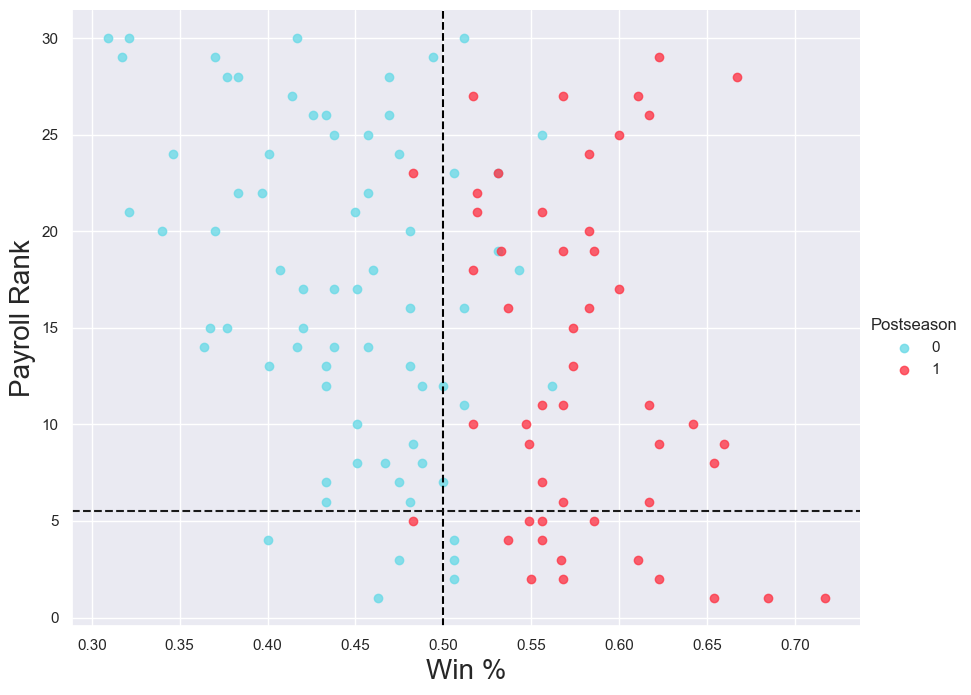

In [14]:
sns.lmplot(x = "Win%", y = "Rank", fit_reg = False, hue = "Postseason", data = df,height = 7, aspect=1.25)
plt.xlabel("Win %", fontsize = 20)
plt.ylabel("Payroll Rank", fontsize = 20)
plt.axvline(.5, 0, 1, color = "Black", ls = '--') #Threshold for .500 winning percentage
plt.axhline(5.5, 0, 1, color = "k", ls = '--') #Threshold for top 5 ranked payroll teams

plt.show()

Teams that rank in the top 5 in payroll made the playoffs 14/20 times. That is 70%

In addition, There have only been 3 instances of a team in the top 5 rank that had a below .500 winning percentage.

In [15]:
corrcheck = df[['Win%', 'Rank']].copy()

In [16]:
corrcheck.corr(method='pearson')

,Win%,Rank
Win%,1.000000,-0.356515
Rank,-0.356515,1.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Year            120 non-null    category
 1   Rank            120 non-null    int64   
 2   Team            120 non-null    category
 3   League          120 non-null    category
 4   26ManPayroll    120 non-null    int64   
 5   InjuredReserve  120 non-null    int64   
 6   Retained        120 non-null    int64   
 7   Buried          120 non-null    int64   
 8   TotalPayroll    120 non-null    int64   
 9   Win%            120 non-null    float64 
 10  AVG             120 non-null    float64 
 11  OBP             120 non-null    float64 
 12  SLG             120 non-null    float64 
 13  OPS             120 non-null    float64 
 14  ERA             120 non-null    float64 
 15  WHIP            120 non-null    float64 
 16  Postseason      120 non-null    category
dtypes: category(4), 

## Feature Importance / Examining Relationships

Using SelectKBest from sklearn, I am going to get best features. During this process, I will set the target as 'Rank'. In addition, I will set the features as all other continuous variables in the dataset (columns 11-17):

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
 
X = df.iloc[:,11:17] #all continuous variables as independent columns / features
y = df.iloc[:,1] #using 'Rank' as the target column
y = y.astype('int')
bestfeatures = SelectKBest(score_func=chi2, k=3)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']
print(featureScores.nlargest(5,'Score'))

      Feature      Score
5  Postseason  19.600000
3         ERA   3.689120
4        WHIP   0.332459
2         OPS   0.116771
1         SLG   0.095882


It's apparent that whether or not a team makes the postseason has a strong relationship with where they are ranked in regareds to total payroll relative to other teams in the league.

# Loading Future Dataset

Now, I will add the payroll dataset for the upcoming year:

In [19]:
df_future = pd.read_csv('/Users/patkennedy/Desktop/Practicum/Data/MLB_FuturePayroll.csv')
df_future.head(30)

,Year,Rank,Team,League,26ManPayroll,InjuredReserve,Retained,Buried,TotalPayroll
0,2024,16,Arizona Diamondbacks,NL,"$114,771,716","$770,000","$16,000,000",-,"$130,771,716"
1,2024,6,Atlanta Braves,NL,"$193,545,000",-,"$21,770,000","$6,000,000","$221,315,000"
2,2024,23,Baltimore Orioles,AL,"$83,312,000","$1,000,000","$7,666,668",-,"$91,978,668"
3,2024,11,Boston Red Sox,AL,"$135,118,181",-,"$24,940,000",-,"$160,058,181"
4,2024,9,Chicago Cubs,NL,"$193,420,000",-,"$16,550,000","$5,510,000","$215,480,000"
5,2024,17,Chicago White Sox,AL,"$113,423,333","$1,520,000","$10,500,000",-,"$124,673,333"
6,2024,27,Cincinnati Reds,NL,"$75,398,333",-,"$9,250,000",-,"$84,648,333"
7,2024,28,Cleveland Guardians,AL,"$73,933,928",-,"$10,500,000",-,"$84,433,928"
8,2024,15,Colorado Rockies,NL,"$115,185,000","$12,000,000","$5,000,000",-,"$132,185,000"
9,2024,22,Detroit Tigers,AL,"$86,313,333",-,"$8,000,000",-,"$94,313,333"


In [20]:
df_future.shape

(30, 9)

This dataset is much smaller since it only shows the payroll for the 30 teams in the upcoming season (2024). In addition, there is no statistical data in this dataset. This is because no games have been played yet. The model I am going to build will predict these.

In [21]:
df_future.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            30 non-null     int64 
 1   Rank            30 non-null     int64 
 2   Team            30 non-null     object
 3   League          30 non-null     object
 4   26ManPayroll    30 non-null     object
 5   InjuredReserve  30 non-null     object
 6   Retained        30 non-null     object
 7   Buried          30 non-null     object
 8   TotalPayroll    30 non-null     object
dtypes: int64(2), object(7)
memory usage: 2.2+ KB


# Data Cleaning for Future Dataset

Adjusting categorical data:

In [22]:
df_future.Year = df_future.Year.astype('category')
df_future.Team = df_future.Team.astype('category')
df_future.League = df_future.League.astype('category')

df_future.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Year            30 non-null     category
 1   Rank            30 non-null     int64   
 2   Team            30 non-null     category
 3   League          30 non-null     category
 4   26ManPayroll    30 non-null     object  
 5   InjuredReserve  30 non-null     object  
 6   Retained        30 non-null     object  
 7   Buried          30 non-null     object  
 8   TotalPayroll    30 non-null     object  
dtypes: category(3), int64(1), object(5)
memory usage: 3.1+ KB


To take care of missing values, I will replace '-' with '0':

In [23]:
df_future.replace('-', '0', inplace=True)
df_future.head(30)

,Year,Rank,Team,League,26ManPayroll,InjuredReserve,Retained,Buried,TotalPayroll
0,2024,16,Arizona Diamondbacks,NL,"$114,771,716","$770,000","$16,000,000",0,"$130,771,716"
1,2024,6,Atlanta Braves,NL,"$193,545,000",0,"$21,770,000","$6,000,000","$221,315,000"
2,2024,23,Baltimore Orioles,AL,"$83,312,000","$1,000,000","$7,666,668",0,"$91,978,668"
3,2024,11,Boston Red Sox,AL,"$135,118,181",0,"$24,940,000",0,"$160,058,181"
4,2024,9,Chicago Cubs,NL,"$193,420,000",0,"$16,550,000","$5,510,000","$215,480,000"
5,2024,17,Chicago White Sox,AL,"$113,423,333","$1,520,000","$10,500,000",0,"$124,673,333"
6,2024,27,Cincinnati Reds,NL,"$75,398,333",0,"$9,250,000",0,"$84,648,333"
7,2024,28,Cleveland Guardians,AL,"$73,933,928",0,"$10,500,000",0,"$84,433,928"
8,2024,15,Colorado Rockies,NL,"$115,185,000","$12,000,000","$5,000,000",0,"$132,185,000"
9,2024,22,Detroit Tigers,AL,"$86,313,333",0,"$8,000,000",0,"$94,313,333"


Removing dollar signs and commas:

In [24]:
df_future['26ManPayroll'] = df_future['26ManPayroll'].str.replace(',', '')
df_future['26ManPayroll'] = df_future['26ManPayroll'].str.replace('$', '')
df_future['26ManPayroll'] = df_future['26ManPayroll'].astype(int)
df_future['InjuredReserve'] = df_future['InjuredReserve'].str.replace(',', '')
df_future['InjuredReserve'] = df_future['InjuredReserve'].str.replace('$', '')
df_future['InjuredReserve'] = df_future['InjuredReserve'].astype(int)
df_future['Retained'] = df_future['Retained'].str.replace(',', '')
df_future['Retained'] = df_future['Retained'].str.replace('$', '')
df_future['Retained'] = df_future['Retained'].astype(int)
df_future['Buried'] = df_future['Buried'].str.replace(',', '')
df_future['Buried'] = df_future['Buried'].str.replace('$', '')
df_future['Buried'] = df_future['Buried'].astype(int)
df_future['TotalPayroll'] = df_future['TotalPayroll'].str.replace(',', '')
df_future['TotalPayroll'] = df_future['TotalPayroll'].str.replace('$', '')
df_future['TotalPayroll'] = df_future['TotalPayroll'].astype(int)

In [25]:
df_future.head()

,Year,Rank,Team,League,26ManPayroll,InjuredReserve,Retained,Buried,TotalPayroll
0,2024,16,Arizona Diamondbacks,NL,114771716,770000,16000000,0,130771716
1,2024,6,Atlanta Braves,NL,193545000,0,21770000,6000000,221315000
2,2024,23,Baltimore Orioles,AL,83312000,1000000,7666668,0,91978668
3,2024,11,Boston Red Sox,AL,135118181,0,24940000,0,160058181
4,2024,9,Chicago Cubs,NL,193420000,0,16550000,5510000,215480000


In [26]:
df_future.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Year            30 non-null     category
 1   Rank            30 non-null     int64   
 2   Team            30 non-null     category
 3   League          30 non-null     category
 4   26ManPayroll    30 non-null     int64   
 5   InjuredReserve  30 non-null     int64   
 6   Retained        30 non-null     int64   
 7   Buried          30 non-null     int64   
 8   TotalPayroll    30 non-null     int64   
dtypes: category(3), int64(6)
memory usage: 3.1 KB


Now that this dataset is clean, its time to prepare each dataset for ML.

# Dropping Unneccessary Columns from Each Dataset

Before I drop any columns, I will make a copy of each dataset so that I have all columns to refer back to if needed.

In [27]:
df_copy = df.copy()
df_future_copy = df_future.copy()

In [28]:
df_future_copy.head()

,Year,Rank,Team,League,26ManPayroll,InjuredReserve,Retained,Buried,TotalPayroll
0,2024,16,Arizona Diamondbacks,NL,114771716,770000,16000000,0,130771716
1,2024,6,Atlanta Braves,NL,193545000,0,21770000,6000000,221315000
2,2024,23,Baltimore Orioles,AL,83312000,1000000,7666668,0,91978668
3,2024,11,Boston Red Sox,AL,135118181,0,24940000,0,160058181
4,2024,9,Chicago Cubs,NL,193420000,0,16550000,5510000,215480000


Now, I will drop the columns that I do not need for machine learning.

In [29]:
df.drop(['Year', 'Team', 'League', 'InjuredReserve', 'Buried'], axis=1, inplace = True)
df.head()
#drop year and rank too

,Rank,26ManPayroll,Retained,TotalPayroll,Win%,AVG,OBP,SLG,OPS,ERA,WHIP,Postseason
0,21,60263998,39202529,119257651,0.519,0.250,0.322,0.408,0.730,4.48,1.32,1
1,10,158186507,11447888,206239131,0.642,0.276,0.344,0.501,0.845,4.14,1.30,1
2,29,53159734,9861733,71061047,0.623,0.255,0.321,0.421,0.742,3.89,1.24,1
3,13,128063857,22444333,182926796,0.481,0.258,0.324,0.424,0.748,4.52,1.34,0
4,11,134251105,35403285,188909358,0.512,0.254,0.330,0.421,0.751,4.08,1.28,0


In [30]:
df_future.drop(['Year', 'Team', 'League', 'InjuredReserve', 'Buried'], axis=1, inplace = True)
df_future.head()

,Rank,26ManPayroll,Retained,TotalPayroll
0,16,114771716,16000000,130771716
1,6,193545000,21770000,221315000
2,23,83312000,7666668,91978668
3,11,135118181,24940000,160058181
4,9,193420000,16550000,215480000


# More Feature Selection

Now with the updated dataframe, I will examine relationships. First, with a corrmat, and then with a heatmap for a better visual:

In [31]:
corrmat = df.corr()
corrmat

,Rank,26ManPayroll,Retained,TotalPayroll,Win%,AVG,OBP,SLG,OPS,ERA,WHIP,Postseason
Rank,1.000000,-0.710446,-0.212695,-0.758448,-0.356515,-0.363413,-0.500242,-0.472288,-0.500115,0.253821,0.240043,-0.234346
26ManPayroll,-0.710446,1.000000,0.014864,0.868232,0.492301,0.321850,0.360198,0.333638,0.355853,-0.512556,-0.477073,0.356715
Retained,-0.212695,0.014864,1.000000,0.371572,-0.256183,-0.040857,-0.145291,-0.110310,-0.125349,0.219056,0.239973,-0.306281
TotalPayroll,-0.758448,0.868232,0.371572,1.000000,0.311186,0.280436,0.283249,0.270158,0.285664,-0.347379,-0.298606,0.142681
Win%,-0.356515,0.492301,-0.256183,0.311186,1.000000,0.320820,0.607766,0.576644,0.608530,-0.807686,-0.776982,0.770191
AVG,-0.363413,0.321850,-0.040857,0.280436,0.320820,1.000000,0.740839,0.765541,0.786617,0.007967,0.061565,0.207105
OBP,-0.500242,0.360198,-0.145291,0.283249,0.607766,0.740839,1.000000,0.836617,0.922149,-0.245674,-0.235934,0.465478
SLG,-0.472288,0.333638,-0.110310,0.270158,0.576644,0.765541,0.836617,1.000000,0.983298,-0.188230,-0.184407,0.400302
OPS,-0.500115,0.355853,-0.125349,0.285664,0.608530,0.786617,0.922149,0.983298,1.000000,-0.215305,-0.209164,0.436426
ERA,0.253821,-0.512556,0.219056,-0.347379,-0.807686,0.007967,-0.245674,-0.188230,-0.215305,1.000000,0.930848,-0.612069


In [32]:
cols = df.columns

<function matplotlib.pyplot.show(close=None, block=None)>

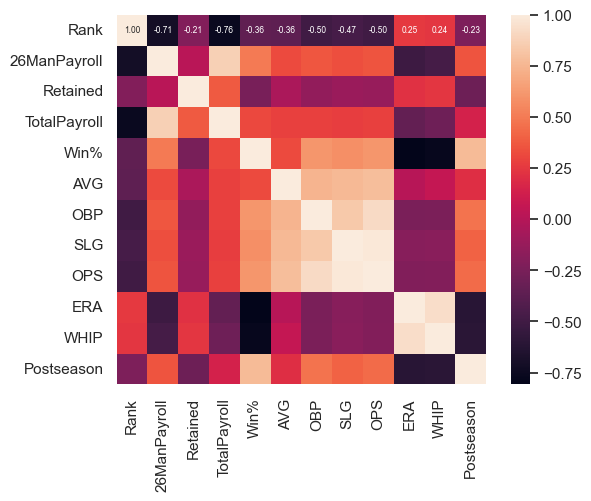

In [33]:
hm = sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':6},yticklabels=cols.values, xticklabels=cols.values)
plt.show

Analysis.

# Preparing the Data

To prepare the data, I am going to split dataset into features (X) and targets (y). 

In [34]:
# Split dataset into features (X) and targets (y)
X = df.iloc[:, :4]  # First 4 (financial data) as features
y = df.iloc[:, 4:]  # Last 8 columns (performance data) as targets

# For the upcoming year's prediction, I already have the first 4 columns.
X_future = df_future 

# Preprocessing Data

To preprocess the data for ML, I am going to scale the features so that the datasets match.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_future_scaled = scaler.transform(X_future)  # Use the same scaler

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Choosing a Model

Since the dataset involves predicting multiple outputs, I am going to use MultiOutputRegressor and a Random Forest generator to support multi-output regression.

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

# Initialize the model
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))

# Fit the model
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

# Model Evaluation

After training the model, I will now evaluate its performance using the test set.

In [37]:
from sklearn.metrics import mean_squared_error

# Predict on testing set
y_pred = model.predict(X_test)

# Evaluate the model
error = mean_squared_error(y_test, y_pred, multioutput='raw_values')
print(f'MSE on test set: {error}')

MSE on test set: [4.14769968e-03 1.87353221e-04 2.58719162e-04 7.89011758e-04
 1.72276013e-03 1.94174261e-01 5.47002292e-03 1.69833333e-01]


# Making Predictions for the Upcoming Season

In [38]:
# Predict future data
future_predictions = model.predict(X_future_scaled)

# Convert predictions to DataFrame for easier handling
future_predictions_df = pd.DataFrame(future_predictions, columns=[f'Predicted_{col}' for col in y.columns])
future_predictions_df

,Predicted_Win%,Predicted_AVG,Predicted_OBP,Predicted_SLG,Predicted_OPS,Predicted_ERA,Predicted_WHIP,Predicted_Postseason
0,0.47119,0.24096,0.30163,0.39079,0.69064,4.0226,1.2918,0.33
1,0.53144,0.25223,0.32488,0.41249,0.73680,3.9650,1.2713,0.75
2,0.51574,0.24386,0.31445,0.40490,0.71650,4.0940,1.2685,0.36
3,0.53861,0.25130,0.31746,0.42246,0.73592,3.9589,1.2780,0.49
4,0.54047,0.25236,0.32537,0.42056,0.74697,3.8607,1.2687,0.53
5,0.54524,0.24264,0.30158,0.39295,0.69410,3.8394,1.2539,0.89
6,0.51618,0.23606,0.30978,0.39404,0.70697,4.1188,1.2756,0.25
7,0.52872,0.23824,0.31259,0.39890,0.71631,4.0873,1.2681,0.60
8,0.50730,0.24467,0.31038,0.41717,0.72300,4.0785,1.2797,0.48
9,0.52991,0.24037,0.31354,0.39567,0.71044,3.9698,1.2581,0.43


Next, I am going to add 'Rank' and 'Team' into this new predictions dataset from the df_future_copy that I created:

In [39]:
future_predictions_df.insert(0, 'Rank', df_future_copy['Rank'])
future_predictions_df.insert(1, 'Team', df_future_copy['Team'])
future_predictions_df.insert(2, 'League', df_future_copy['League'])
print(future_predictions_df)

    Rank                   Team League  Predicted_Win%  Predicted_AVG  \
0     16   Arizona Diamondbacks     NL         0.47119        0.24096   
1      6         Atlanta Braves     NL         0.53144        0.25223   
2     23      Baltimore Orioles     AL         0.51574        0.24386   
3     11         Boston Red Sox     AL         0.53861        0.25130   
4      9           Chicago Cubs     NL         0.54047        0.25236   
5     17      Chicago White Sox     AL         0.54524        0.24264   
6     27        Cincinnati Reds     NL         0.51618        0.23606   
7     28    Cleveland Guardians     AL         0.52872        0.23824   
8     15       Colorado Rockies     NL         0.50730        0.24467   
9     22         Detroit Tigers     AL         0.52991        0.24037   
10     3         Houston Astros     AL         0.57100        0.24798   
11    20     Kansas City Royals     AL         0.55559        0.23800   
12    12     Los Angeles Angels     AL         0.54

Looks good. However, there are 20 teams that have over a 50% chance of making the postseason. In the MLB, only 12 teams make the postseason - 6 from each League. Therefore, I am going to add a column that selects the top 6 teams from each league that have the highest predicted percentage of making the postseason:

In [40]:
# Sort the DataFrame by League and Predicted_Postseason in descending order
df_sorted = future_predictions_df.sort_values(by=['League', 'Predicted_Postseason'], ascending=[True, False])

# Group by 'League' and use the `head` method to select the top 6 rows for each league
top_al_nl = df_sorted.groupby('League').head(6)

# Create a new column, defaulting all values to 'No'
future_predictions_df['Top6_Postseason'] = 'No'

# Update the new column in df where the index matches the index of top_al_nl, setting those to 'Yes'
future_predictions_df.loc[top_al_nl.index, 'Top6_Postseason'] = 'Yes'

print(future_predictions_df)

    Rank                   Team League  Predicted_Win%  Predicted_AVG  \
0     16   Arizona Diamondbacks     NL         0.47119        0.24096   
1      6         Atlanta Braves     NL         0.53144        0.25223   
2     23      Baltimore Orioles     AL         0.51574        0.24386   
3     11         Boston Red Sox     AL         0.53861        0.25130   
4      9           Chicago Cubs     NL         0.54047        0.25236   
5     17      Chicago White Sox     AL         0.54524        0.24264   
6     27        Cincinnati Reds     NL         0.51618        0.23606   
7     28    Cleveland Guardians     AL         0.52872        0.23824   
8     15       Colorado Rockies     NL         0.50730        0.24467   
9     22         Detroit Tigers     AL         0.52991        0.24037   
10     3         Houston Astros     AL         0.57100        0.24798   
11    20     Kansas City Royals     AL         0.55559        0.23800   
12    12     Los Angeles Angels     AL         0.54

/var/folders/f3/jy4pzrnn5898g7k0ngbpzmqw0000gn/T/ipykernel_68584/3421067996.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_al_nl = df_sorted.groupby('League').head(6)


Great! Here are the final predictions for the future dataset:

In [41]:
future_predictions_df

,Rank,Team,League,Predicted_Win%,Predicted_AVG,Predicted_OBP,Predicted_SLG,Predicted_OPS,Predicted_ERA,Predicted_WHIP,Predicted_Postseason,Top6_Postseason
0,16,Arizona Diamondbacks,NL,0.47119,0.24096,0.30163,0.39079,0.69064,4.0226,1.2918,0.33,No
1,6,Atlanta Braves,NL,0.53144,0.25223,0.32488,0.41249,0.73680,3.9650,1.2713,0.75,Yes
2,23,Baltimore Orioles,AL,0.51574,0.24386,0.31445,0.40490,0.71650,4.0940,1.2685,0.36,No
3,11,Boston Red Sox,AL,0.53861,0.25130,0.31746,0.42246,0.73592,3.9589,1.2780,0.49,No
4,9,Chicago Cubs,NL,0.54047,0.25236,0.32537,0.42056,0.74697,3.8607,1.2687,0.53,No
5,17,Chicago White Sox,AL,0.54524,0.24264,0.30158,0.39295,0.69410,3.8394,1.2539,0.89,Yes
6,27,Cincinnati Reds,NL,0.51618,0.23606,0.30978,0.39404,0.70697,4.1188,1.2756,0.25,No
7,28,Cleveland Guardians,AL,0.52872,0.23824,0.31259,0.39890,0.71631,4.0873,1.2681,0.60,No
8,15,Colorado Rockies,NL,0.50730,0.24467,0.31038,0.41717,0.72300,4.0785,1.2797,0.48,No
9,22,Detroit Tigers,AL,0.52991,0.24037,0.31354,0.39567,0.71044,3.9698,1.2581,0.43,No


In [42]:
# Save the DataFrame to a CSV file
# future_predictions_df.to_csv('/Users/patkennedy/Desktop/Practicum/Data/2024_Predictions.csv', index=False)

# Conclusion

In this project, I examined the relationship between MLB teams' payroll and their output and success on the field. Furthermore, I made predictions for team statistics based on preseason payroll data. Throughout the project, I found strong correlations between pitching stats and payroll rank. In addition, there were interesting correlations between payroll rank, winning percentage, and whether or not a team made the postseason that year. To make predictions for the 2024 season, I used Multi-Output Regresson and Random Forest Regresson. I am excited measure how my preseason predictions match up at the end of the 2024 regular season in October!